In [18]:
import pyms
import numpy as np
import matplotlib.pyplot as plt
import torch
%matplotlib inline

# Get crystal
crystal = pyms.structure.fromfile('Structures/SrTiO3.xyz',temperature_factor_units='ums')

eV = 3e5 # Probe accelerating voltage in eV
app = 15 # Probe-forming aperture in mrad

# Set up thickness series
thicknesses = np.asarray([3.905,3.905*16])

# Define detector inner and outer angles
# in order, a central bright-field detector, an annular 
# bright-field (ABF) detector 
detectors = [[0,app/2], [app/2,app]]


# Define transitions on which cross-section calculations will be based
signal_list = [{"signal":"EELS","Z":8,"shell":"1s","E0":eV,"DeltaE":35,},
               {"signal":"EELS","Z":22,"shell":"2p","E0":eV,"DeltaE":35,},
               {"signal":"EELS","Z":38,"shell":"2p","E0":eV,"DeltaE":35,}]
nsignals = len(signal_list)



Frozen phonon iteration:   0%|          | 0/25 [00:00<?, ?it/s]

Making projected potentials:   0%|          | 0/5 [00:00<?, ?it/s]

Defocus series:   0%|          | 0/1 [00:00<?, ?it/s]

Probe positions:   0%|          | 0/29 [00:00<?, ?it/s]

Defocus series:   0%|          | 0/1 [00:00<?, ?it/s]

Probe positions:   0%|          | 0/29 [00:00<?, ?it/s]

Defocus series:   0%|          | 0/1 [00:00<?, ?it/s]

Probe positions:   0%|          | 0/29 [00:00<?, ?it/s]

Defocus series:   0%|          | 0/1 [00:00<?, ?it/s]

Probe positions:   0%|          | 0/29 [00:00<?, ?it/s]

Defocus series:   0%|          | 0/1 [00:00<?, ?it/s]

Probe positions:   0%|          | 0/29 [00:00<?, ?it/s]

Defocus series:   0%|          | 0/1 [00:00<?, ?it/s]

Probe positions:   0%|          | 0/29 [00:00<?, ?it/s]

Defocus series:   0%|          | 0/1 [00:00<?, ?it/s]

Probe positions:   0%|          | 0/29 [00:00<?, ?it/s]

Defocus series:   0%|          | 0/1 [00:00<?, ?it/s]

Probe positions:   0%|          | 0/29 [00:00<?, ?it/s]

Defocus series:   0%|          | 0/1 [00:00<?, ?it/s]

Probe positions:   0%|          | 0/29 [00:00<?, ?it/s]

Defocus series:   0%|          | 0/1 [00:00<?, ?it/s]

Probe positions:   0%|          | 0/29 [00:00<?, ?it/s]

Defocus series:   0%|          | 0/1 [00:00<?, ?it/s]

Probe positions:   0%|          | 0/29 [00:00<?, ?it/s]

Defocus series:   0%|          | 0/1 [00:00<?, ?it/s]

Probe positions:   0%|          | 0/29 [00:00<?, ?it/s]

Defocus series:   0%|          | 0/1 [00:00<?, ?it/s]

Probe positions:   0%|          | 0/29 [00:00<?, ?it/s]

Defocus series:   0%|          | 0/1 [00:00<?, ?it/s]

Probe positions:   0%|          | 0/29 [00:00<?, ?it/s]

Defocus series:   0%|          | 0/1 [00:00<?, ?it/s]

Probe positions:   0%|          | 0/29 [00:00<?, ?it/s]

Defocus series:   0%|          | 0/1 [00:00<?, ?it/s]

Probe positions:   0%|          | 0/29 [00:00<?, ?it/s]

Defocus series:   0%|          | 0/1 [00:00<?, ?it/s]

Probe positions:   0%|          | 0/29 [00:00<?, ?it/s]

Defocus series:   0%|          | 0/1 [00:00<?, ?it/s]

Probe positions:   0%|          | 0/29 [00:00<?, ?it/s]

Defocus series:   0%|          | 0/1 [00:00<?, ?it/s]

Probe positions:   0%|          | 0/29 [00:00<?, ?it/s]

Defocus series:   0%|          | 0/1 [00:00<?, ?it/s]

Probe positions:   0%|          | 0/29 [00:00<?, ?it/s]

Defocus series:   0%|          | 0/1 [00:00<?, ?it/s]

Probe positions:   0%|          | 0/29 [00:00<?, ?it/s]

Defocus series:   0%|          | 0/1 [00:00<?, ?it/s]

Probe positions:   0%|          | 0/29 [00:00<?, ?it/s]

Defocus series:   0%|          | 0/1 [00:00<?, ?it/s]

Probe positions:   0%|          | 0/29 [00:00<?, ?it/s]

Defocus series:   0%|          | 0/1 [00:00<?, ?it/s]

Probe positions:   0%|          | 0/29 [00:00<?, ?it/s]

Defocus series:   0%|          | 0/1 [00:00<?, ?it/s]

Probe positions:   0%|          | 0/29 [00:00<?, ?it/s]

elapsed time in seconds:  286.30611085891724


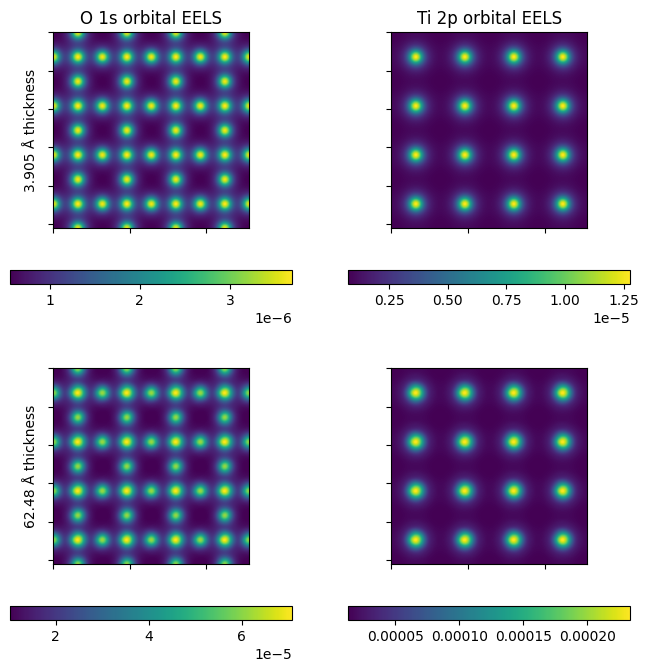

In [19]:
import time
t = time.time()

# Run multislice calculation
result2 = pyms.STEM_multislice(
    crystal,
    eV,
    app,
    thicknesses,
    detector_ranges=detectors,
    signal_list=signal_list,
    showProgress='notebook'
)

elapsed = time.time() - t
print('elapsed time in seconds: ',elapsed)

# Convert signal_list and thicknesses to  column and row titles:
column_titles = ['{0} {1} orbital {2}'.format(pyms.atomic_symbol[x['Z']],x['shell'],x['signal']) for x in signal_list]
row_titles = ['{0} Å thickness'.format(i) for i in thicknesses]

# Tile and upsample the raw simulation result so it is nice to look at
result = pyms.utils.fourier_interpolate(np.tile(result2["STEM crosssection images"],(1,1,4,4)),[256,256])

# Plot results
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(2, 2, 1)
imgplot = plt.imshow(result[0,0])
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())

ax.set_title(column_titles[0])
ax.set_ylabel(row_titles[0])
plt.colorbar(orientation='horizontal')
ax = fig.add_subplot(2, 2, 2)
imgplot = plt.imshow(result[1,0])
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())

ax.set_title(column_titles[1])
plt.colorbar(orientation='horizontal')
ax = fig.add_subplot(2, 2, 3)
imgplot = plt.imshow(result[0,1])
ax.set_ylabel(row_titles[1])
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())

plt.colorbar(orientation='horizontal')
ax = fig.add_subplot(2, 2, 4)
imgplot = plt.imshow(result[1,1])
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())

plt.colorbar(orientation='horizontal')

    

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

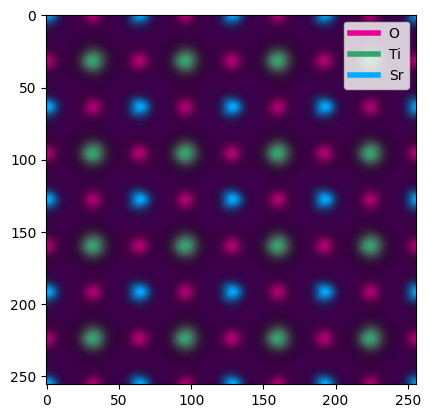

In [126]:
from matplotlib.colors import LinearSegmentedColormap

#Colors for Sr Ti O in composite map
labels= ['O','Ti','Sr']
colors = ['#ff00aa','#00aaff','#aaff00']
colors = ['#ea0096','#33a56c','#00aaff'  ]
#colors = ['red','blue','magenta'  ]
def composite_colormap(result,colors = ['#ff00aa','#00aaff','#aaff00'],labels=None,ax=None,blackbackground=False):
    from matplotlib.colors import LinearSegmentedColormap
    cmaps = [LinearSegmentedColormap.from_list(c, ["#000000", c]) for c in colors]

    if ax is None:
        fig,ax = plt.subplots()

    if blackbackground:
        ax.imshow(np.zeros_like(result[0]),vmax=1,vmin=0)

    for i,r in enumerate(result):
        ax.imshow(r,cmap=cmaps[i],alpha=pyms.utils.renormalize(r))

    from matplotlib.lines import Line2D

    custom_lines = [Line2D([0], [0], color=c, lw=4) for c in colors]
    
    if labels is not None:
        ax.legend(custom_lines, labels)
    return fig,ax
composite_colormap(result[:,1],colors,labels=labels,blackbackground=False)

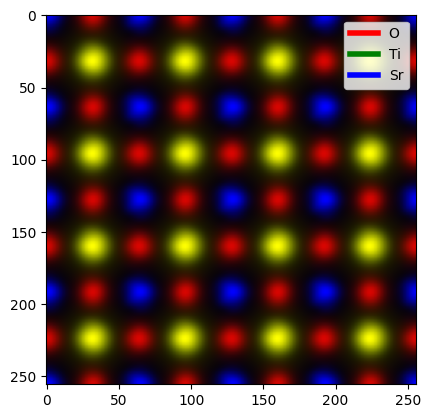

In [119]:
def cmyk_to_rgb(c, m, y, k, cmyk_scale=None, rgb_scale=255):
    """Convert cmyk colormap to rgb colormap"""
    if cmyk_scale is None:
        cmyk_scale = max([np.amax(a) for a in [c,m,y,k]])
    r = rgb_scale * (1.0 - c / float(cmyk_scale)) * (1.0 - k / float(cmyk_scale))
    g = rgb_scale * (1.0 - m / float(cmyk_scale)) * (1.0 - k / float(cmyk_scale))
    b = rgb_scale * (1.0 - y / float(cmyk_scale)) * (1.0 - k / float(cmyk_scale))
    
    # Stack red green and blue channels
    print([a.shape for a in [r,g,b]])
    return np.stack((r, g, b),axis=-1)

def cmy_composite_colormap(result,labels=None,renormalize=True):

    nchannels = result.shape[0]

    assert nchannels <= 3

    # If <3 channels, add zero values for missing colors
    rgb = np.concatenate((result,np.zeros((3-nchannels,)+result.shape[1:])),axis=0)

    # Move colour axis from first to last dimension of array 
    # in accordance with numpy 
    rgb = np.moveaxis(rgb,0,-1)

    fig,ax = plt.subplots()

    if renormalize:
        for i in range(3):
            rgb[...,i] = pyms.utils.renormalize(rgb[...,i]) 
    else:
        rgb = pyms.utils.renormalize(rgb) 

    ax.imshow(rgb)
    custom_lines = [Line2D([0], [0], color=c, lw=4) for c in ['r','g','b']]
    
    if labels is not None:
        ax.legend(custom_lines, labels)

cmy_composite_colormap(result[:,1],labels=labels)